In [1]:
import pandas as pd
import numpy as np
import re

from numpy import array

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

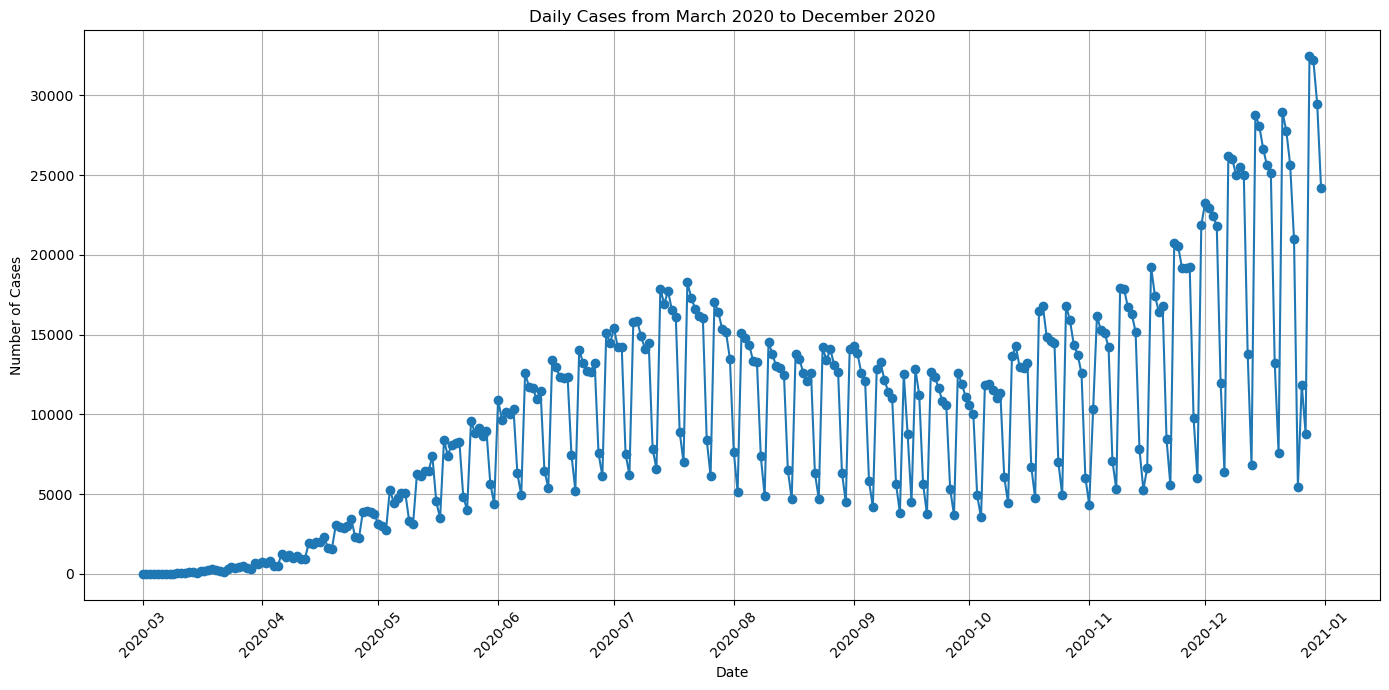

In [3]:
df_transposed = df.set_index(['cve_ent', 'poblacion', 'nombre']).T

df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

mask = (df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')
df_filtered = df_transposed.loc[mask]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], df_daily, marker='o', linestyle='-')
plt.title('Daily Cases from March 2020 to December 2020')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [4]:
estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]
df_filtrado.fillna(method='ffill', inplace=True)

C:\Users\eubgo\AppData\Local\Temp\ipykernel_3352\340870129.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado.fillna(method='ffill', inplace=True)
C:\Users\eubgo\AppData\Local\Temp\ipykernel_3352\340870129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(method='ffill', inplace=True)
